In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Read the dataset
df = pd.read_csv('train_dataset_final1.csv')
df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [67]:
print(df.shape)
print(df.info())
print(df.describe())

(25247, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float

In [68]:
# Missing values
print(df.isnull().sum())

#in age replace nulls with mean
df['age'].fillna(df['age'].median(), inplace=True)

Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64


C:\Users\krish\AppData\Local\Temp\ipykernel_85392\282367700.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


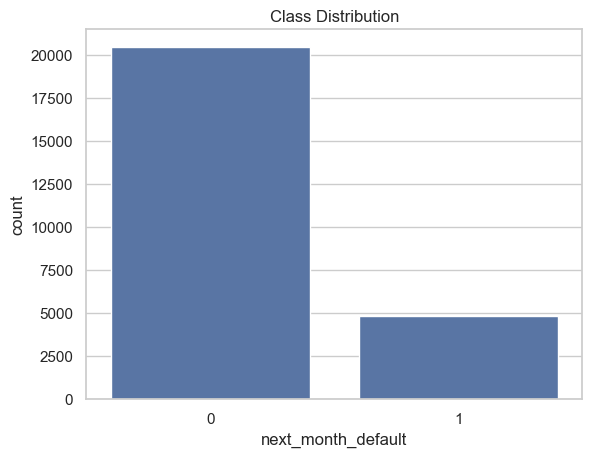

next_month_default
0    0.809601
1    0.190399
Name: proportion, dtype: float64


In [69]:
# Target variable distribution
sns.countplot(x='next_month_default', data=df)
plt.title("Class Distribution")
plt.show()

print(df['next_month_default'].value_counts(normalize=True))

# -> 20% of users are likely to default next month

Total rows in the dataset: 25247


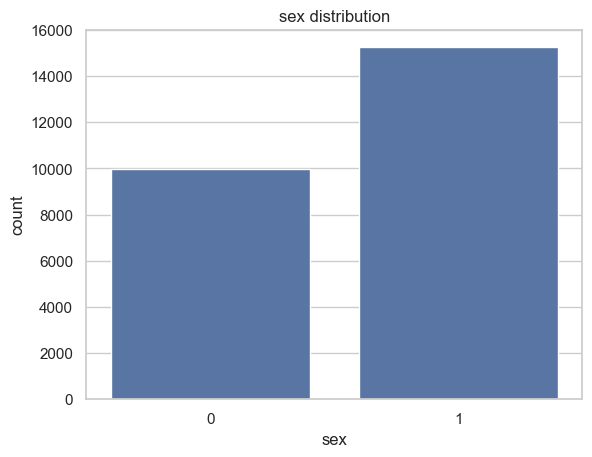

sex unique values: [0 1]
sex
1    60.411138
0    39.588862
Name: proportion, dtype: float64
sex
1    15252
0     9995
Name: count, dtype: int64


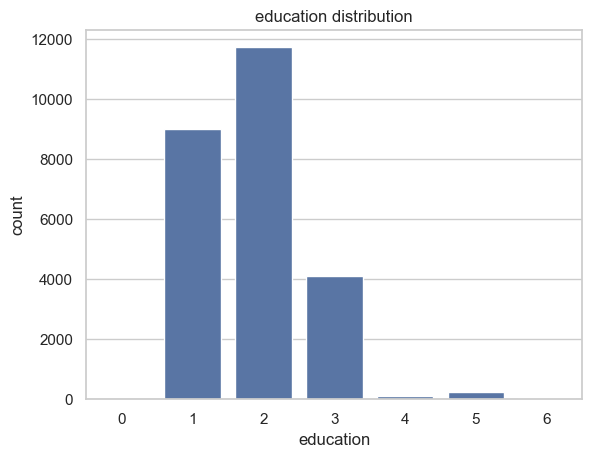

education unique values: [2 1 3 4 5 6 0]
education
2    46.409474
1    35.600269
3    16.298966
5     1.002099
4     0.459461
6     0.174278
0     0.055452
Name: proportion, dtype: float64
education
2    11717
1     8988
3     4115
5      253
4      116
6       44
0       14
Name: count, dtype: int64


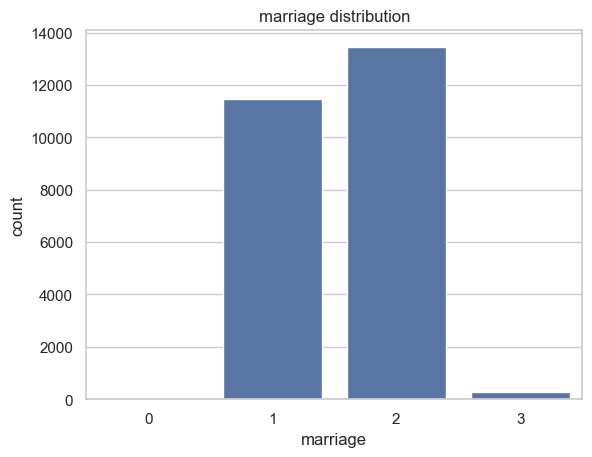

marriage unique values: [2 1 3 0]
marriage
2    53.238008
1    45.470749
3     1.081317
0     0.209926
Name: proportion, dtype: float64
marriage
2    13441
1    11480
3      273
0       53
Name: count, dtype: int64


In [70]:
categorical_cols = ['sex', 'education', 'marriage']

#print total rows in the dataset
print("Total rows in the dataset:", len(df))

for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} distribution')
    plt.show()
    print(f"{col} unique values:", df[col].unique())
    print(df[col].value_counts(normalize=True) * 100)
    print(df[col].value_counts())

# 297 outliers for education
# 273 outliers for marriage
# Very less married people in the dataset -> only 53 out of 25247

#In marriage replace 3+ with median of 0,1,2
df['marriage'] = df['marriage'].replace(0, 3)

#In edu replace 3+ with median of 0,1,2
df['education'] = df['education'].replace(0, 4)
df['education'] = df['education'].replace(5, 4)
df['education'] = df['education'].replace(6, 4)


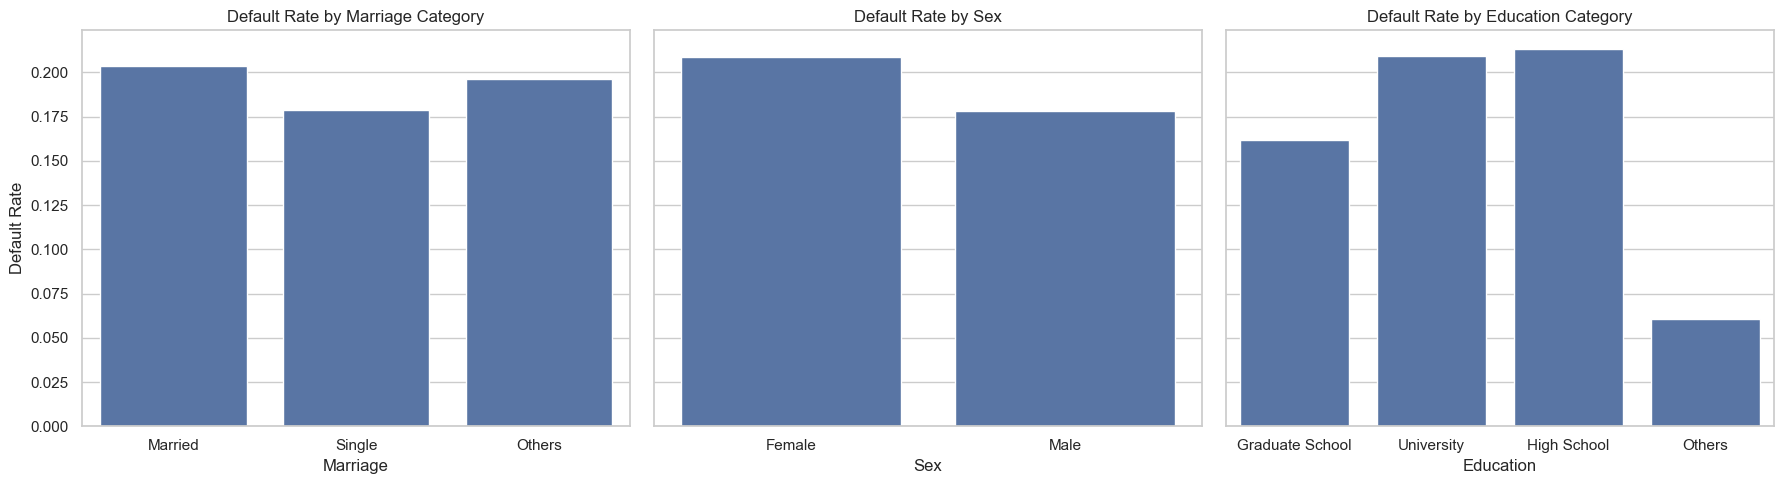

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: consistent plot style
sns.set(style='whitegrid')

# Convert category dtype to numeric for groupby to work
df['marriage'] = df['marriage'].astype(int)
df['sex'] = df['sex'].astype(int)
df['education'] = df['education'].astype(int)

# 1. Group by and calculate default rates
marriage_default = df.groupby('marriage')['next_month_default'].mean().reset_index()
sex_default = df.groupby('sex')['next_month_default'].mean().reset_index()
education_default = df.groupby('education')['next_month_default'].mean().reset_index()

# 2. Replace codes with labels
marriage_default['marriage'] = marriage_default['marriage'].map({1: 'Married', 2: 'Single', 3: 'Others'})
sex_default['sex'] = sex_default['sex'].map({1: 'Male', 0: 'Female'})
education_default['education'] = education_default['education'].map({
    1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'
})

# 3. Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot: Marriage
sns.barplot(data=marriage_default, x='marriage', y='next_month_default', ax=axes[0])
axes[0].set_title("Default Rate by Marriage Category")
axes[0].set_ylabel("Default Rate")
axes[0].set_xlabel("Marriage")

# Plot: Sex
sns.barplot(data=sex_default, x='sex', y='next_month_default', ax=axes[1])
axes[1].set_title("Default Rate by Sex")
axes[1].set_ylabel("")
axes[1].set_xlabel("Sex")

# Plot: Education
sns.barplot(data=education_default, x='education', y='next_month_default', ax=axes[2])
axes[2].set_title("Default Rate by Education Category")
axes[2].set_ylabel("")
axes[2].set_xlabel("Education")

# Clean layout
plt.tight_layout()
plt.show()


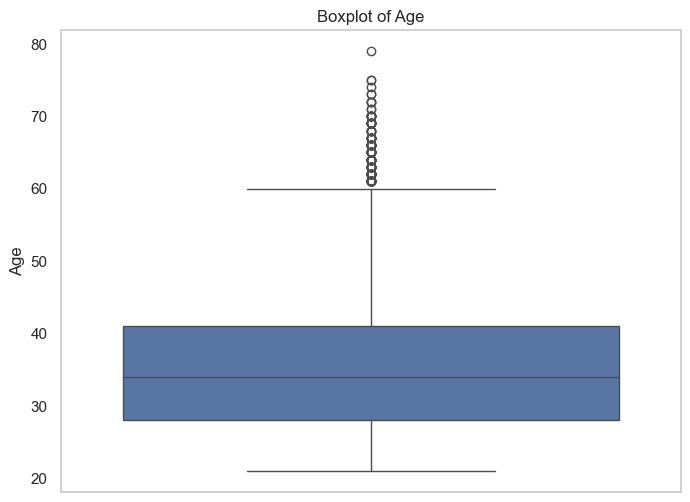

In [72]:
# Boxplot for age
plt.figure(figsize=(8, 6))

sns.boxplot(y='age', data=df)
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.grid(axis='y')
plt.show()


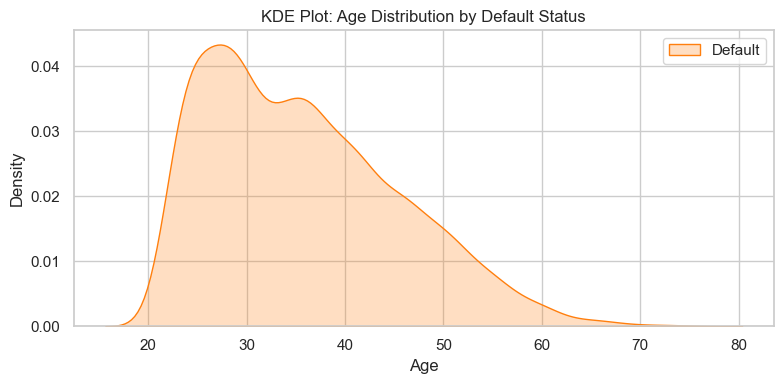

In [73]:
# KDE plot: Age distributions split by default status
plt.figure(figsize=(8, 4))

sns.kdeplot(
    data=df[df['next_month_default'] == 1],
    x='age',
    label='Default',
    fill=True,
    color="#ff7f0e"
)
plt.title("KDE Plot: Age Distribution by Default Status")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

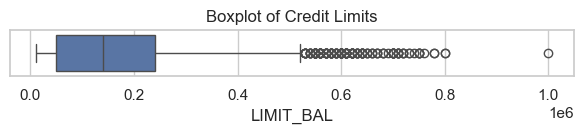

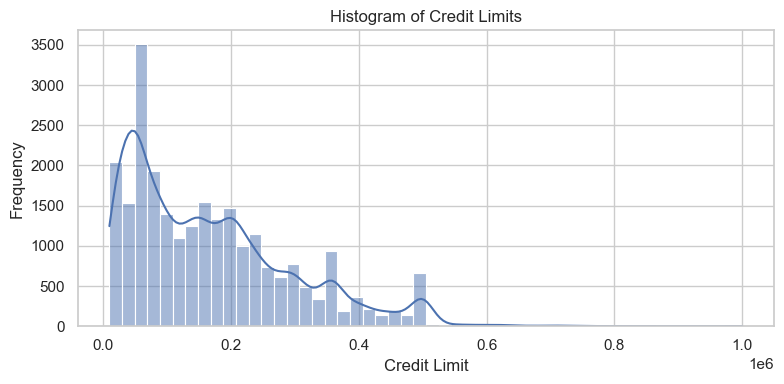

In [74]:
# EDA for Limit Balance
# 2. Boxplot of Credit Limit
plt.figure(figsize=(6, 1.5))
sns.boxplot(x=df['LIMIT_BAL'])
plt.title("Boxplot of Credit Limits")
plt.tight_layout()
plt.show()

#also print histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['LIMIT_BAL'], bins=50, kde=True)
plt.title("Histogram of Credit Limits")
plt.xlabel("Credit Limit")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


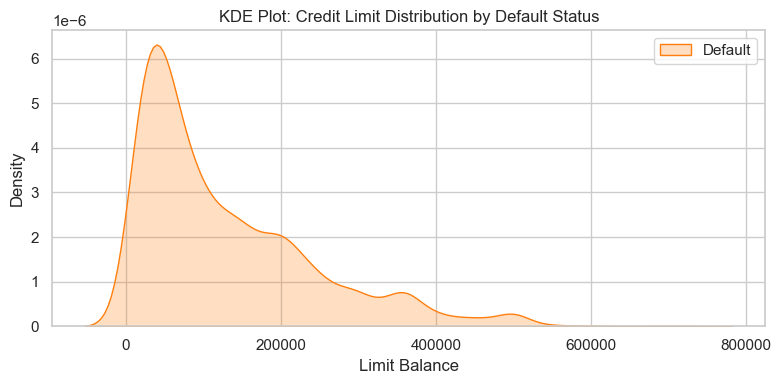

In [75]:
# kde plot for Limit Balance with default status

plt.figure(figsize=(8, 4))
sns.kdeplot(
    data=df[df['next_month_default'] == 1],
    x='LIMIT_BAL',
    label='Default',
    fill=True,
    color="#ff7f0e"
)
plt.title("KDE Plot: Credit Limit Distribution by Default Status")
plt.xlabel("Limit Balance")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

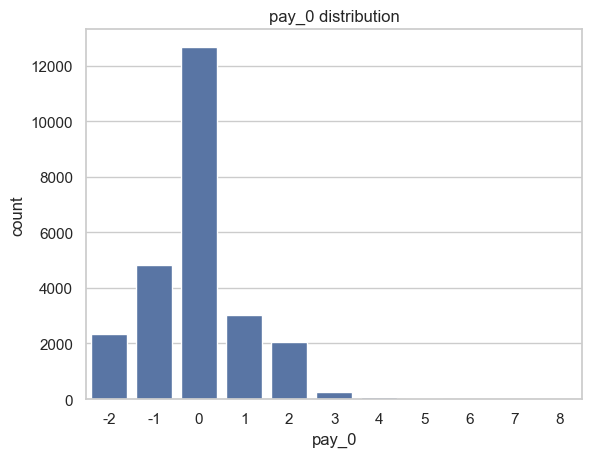

pay_0 unique values: [ 2  0 -2 -1  1  8  4  3  5  6  7]
pay_0 value counts:
 pay_0
 0    12667
-1     4821
 1     3030
-2     2331
 2     2047
 3      244
 4       56
 5       21
 8       14
 6        8
 7        8
Name: count, dtype: int64


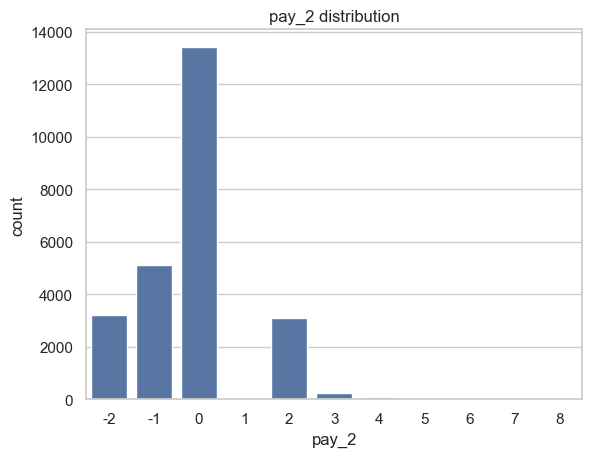

pay_2 unique values: [ 2  0 -2 -1  7  4  3  1  5  6  8]
pay_2 value counts:
 pay_2
 0    13424
-1     5128
-2     3210
 2     3098
 3      239
 4       77
 1       25
 5       19
 7       15
 6       11
 8        1
Name: count, dtype: int64


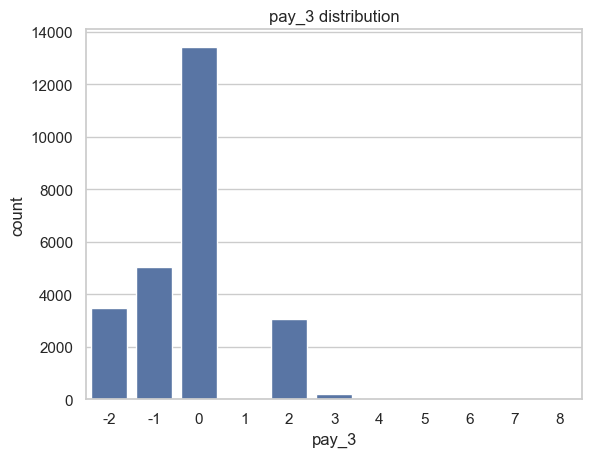

pay_3 unique values: [ 2 -2  0 -1  6  3  4  1  7  5  8]
pay_3 value counts:
 pay_3
 0    13415
-1     5019
-2     3480
 2     3039
 3      179
 4       57
 7       18
 5       18
 6       17
 1        4
 8        1
Name: count, dtype: int64


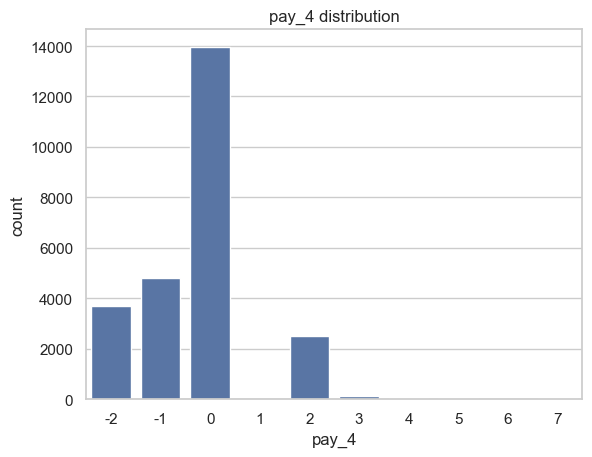

pay_4 unique values: [ 0 -2 -1  2  5  3  4  7  6  1]
pay_4 value counts:
 pay_4
 0    13961
-1     4816
-2     3694
 2     2509
 3      137
 4       52
 7       43
 5       29
 6        4
 1        2
Name: count, dtype: int64


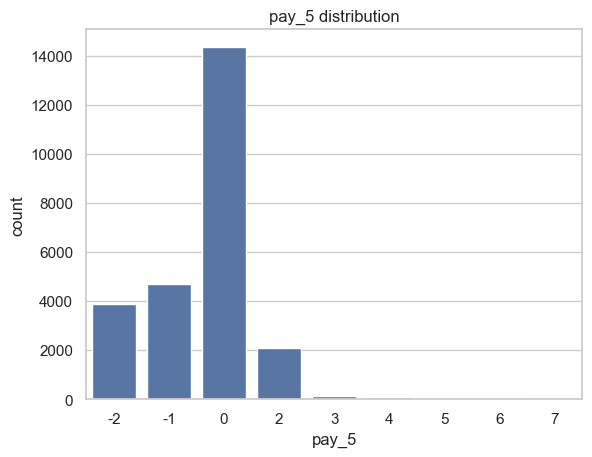

pay_5 unique values: [ 0 -1 -2  2  4  3  6  7  5]
pay_5 value counts:
 pay_5
 0    14345
-1     4680
-2     3859
 2     2100
 3      133
 4       72
 7       43
 5       14
 6        1
Name: count, dtype: int64


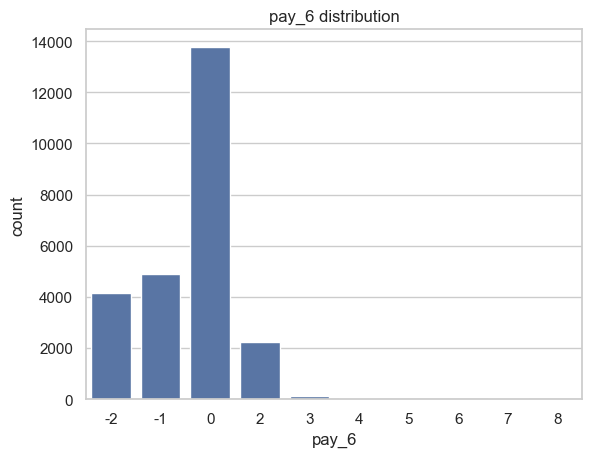

pay_6 unique values: [ 0 -2 -1  2  3  4  5  7  6  8]
pay_6 value counts:
 pay_6
 0    13769
-1     4882
-2     4139
 2     2223
 3      134
 4       41
 7       34
 6       14
 5       10
 8        1
Name: count, dtype: int64


In [76]:
pay_status_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

for col in pay_status_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} distribution')
    plt.show()
    print(f"{col} unique values:", df[col].unique())
    print(f"{col} value counts:\n", df[col].value_counts())
    

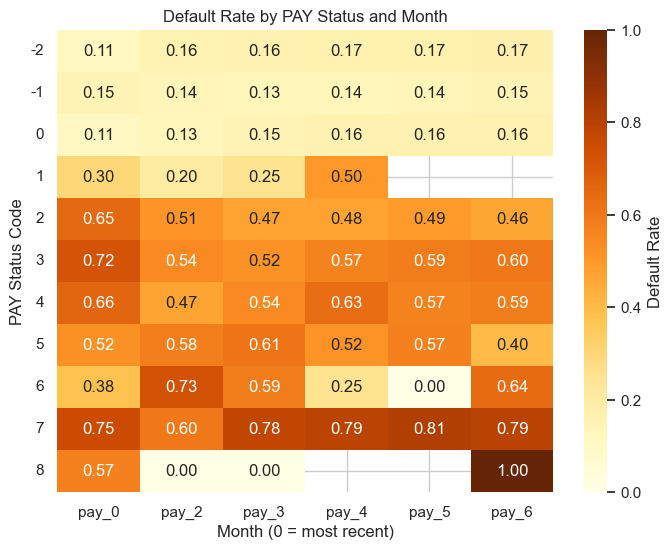

In [77]:
pay_status_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
df_long = (
    df
    .reset_index()                         # preserve original index as “customer_id” if you like
    .melt(id_vars=['next_month_default'], 
          value_vars=pay_status_cols,
          var_name='month',
          value_name='pay_status')
)

# Convert next_month_default to int for aggregation
df_long['next_month_default'] = df_long['next_month_default'].astype(int)

# 2) Compute default rate by (month, pay_status)
pivot = (
    df_long
    .groupby(['month','pay_status'])['next_month_default']
    .mean()
    .reset_index()
    .pivot(index='pay_status', columns='month', values='next_month_default')
)

# 3) Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlOrBr", cbar_kws={'label':'Default Rate'})
plt.title("Default Rate by PAY Status and Month")
plt.xlabel("Month (0 = most recent)")
plt.ylabel("PAY Status Code")
plt.yticks(rotation=0)
plt.show()

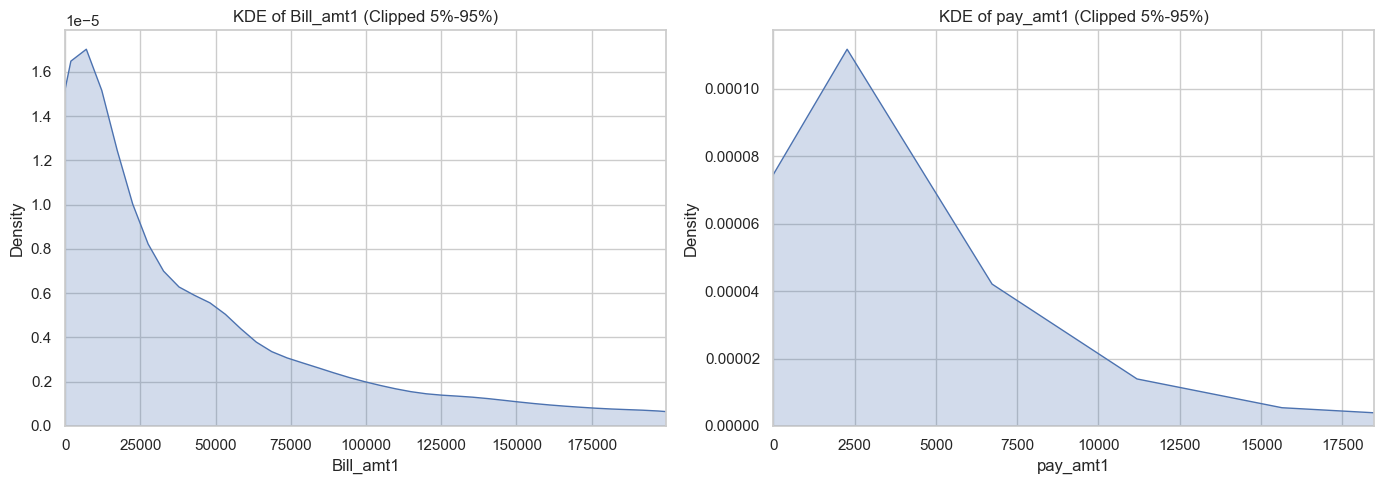

In [78]:
bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]

for col in bill_cols:
    df[col] = df[col].clip(lower=0)
    cap = df[col].quantile(0.99)

pay_cols = [f'pay_amt{i}' for i in range(1, 7)]
for col in pay_cols:
    df[col] = df[col].clip(lower=0)


import matplotlib.pyplot as plt
import seaborn as sns

#5th and 95th percentile limits for clipping just the plot
bill_lower = df['Bill_amt1'].quantile(0.05)
bill_upper = df['Bill_amt1'].quantile(0.95)

pay_lower = df['pay_amt1'].quantile(0.05)
pay_upper = df['pay_amt1'].quantile(0.95)

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# KDE plot for Bill_amt1
sns.kdeplot(df['Bill_amt1'], ax=axes[0], fill=True)
axes[0].set_xlim(bill_lower, bill_upper)
axes[0].set_title('KDE of Bill_amt1 (Clipped 5%-95%)')

# KDE plot for pay_amt1
sns.kdeplot(df['pay_amt1'], ax=axes[1], fill=True)
axes[1].set_xlim(pay_lower, pay_upper)
axes[1].set_title('KDE of pay_amt1 (Clipped 5%-95%)')

plt.tight_layout()
plt.show()


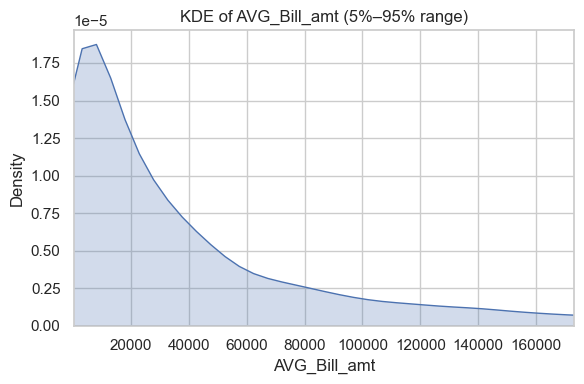

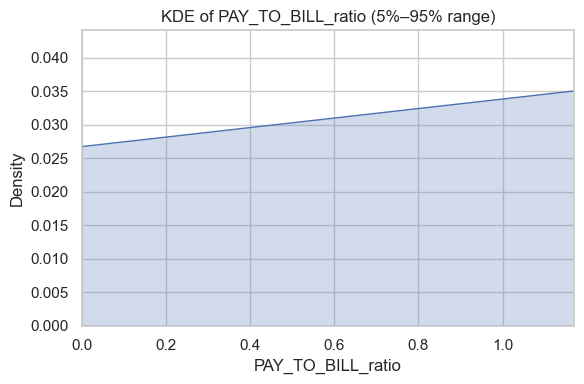

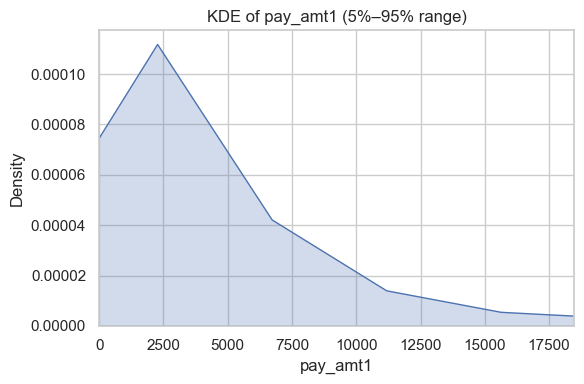

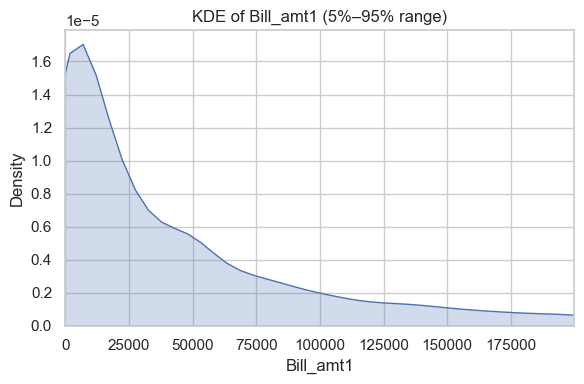

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cap pay_cols values at 0 (only lower bound)
pay_cols = [f'pay_amt{i}' for i in range(1, 7)]
for col in pay_cols:
    df[col] = df[col].clip(lower=0)

# Now define all columns to plot
bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]
eng_cols = ['AVG_Bill_amt', 'PAY_TO_BILL_ratio']

# Combine all for plotting
plot_cols = ['AVG_Bill_amt', 'PAY_TO_BILL_ratio' , 'pay_amt1', 'Bill_amt1']

# KDE plots between 5th and 95th percentiles (only for visual range)
for col in plot_cols:
    q5 = df[col].quantile(0.05)
    q95 = df[col].quantile(0.95)
    
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df[col], fill=True)
    plt.xlim(q5, q95)
    plt.title(f'KDE of {col} (5%–95% range)')
    plt.tight_layout()
    plt.show()


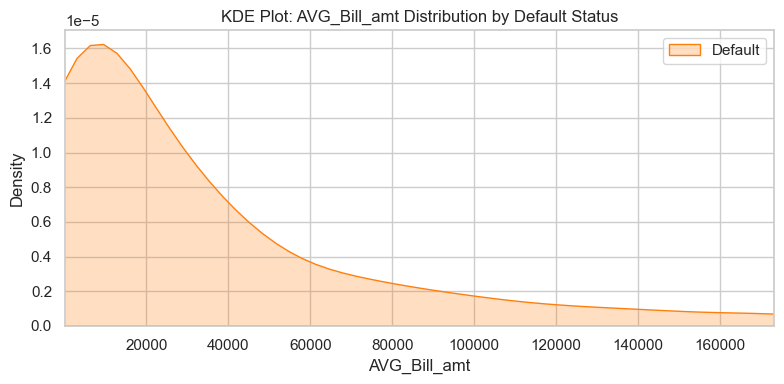

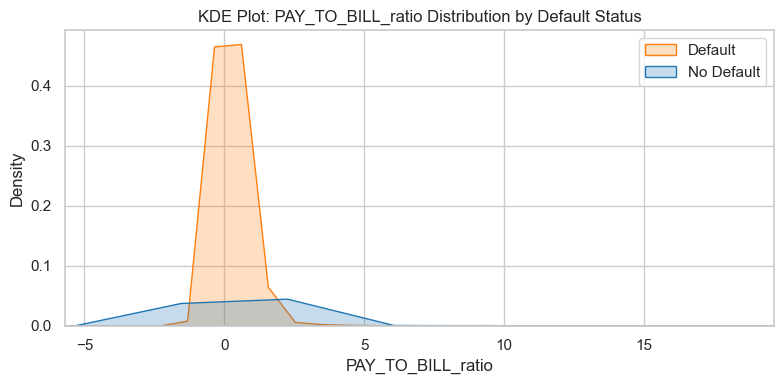

In [80]:
# KDE plot for AVG_Bill_amt (log transformed) with default status
q5_avg = df['AVG_Bill_amt'].quantile(0.05)
q95_avg = df['AVG_Bill_amt'].quantile(0.95)

plt.figure(figsize=(8, 4))
sns.kdeplot(
    data=df[df['next_month_default'] == 1],
    x='AVG_Bill_amt',
    label='Default',
    fill=True,
    color="#ff7f0e"
)
# sns.kdeplot(
#     data=df[df['next_month_default'] == 0],
#     x='AVG_Bill_amt',
#     label='No Default',
#     fill=True,
#     color="#1f77b4"
# )
plt.xlim(q5_avg, q95_avg)
plt.title("KDE Plot: AVG_Bill_amt Distribution by Default Status")
plt.xlabel("AVG_Bill_amt")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


# KDE plot for PAY_TO_BILL_ratio with default status
q5_ratio = df['PAY_TO_BILL_ratio'].quantile(0.001)
q95_ratio = df['PAY_TO_BILL_ratio'].quantile(0.999)

plt.figure(figsize=(8, 4))
sns.kdeplot(
    data=df[df['next_month_default'] == 1],
    x='PAY_TO_BILL_ratio',
    label='Default',
    fill=True,
    color="#ff7f0e"
)
sns.kdeplot(
    data=df[df['next_month_default'] == 0],
    x='PAY_TO_BILL_ratio',
    label='No Default',
    fill=True,
    color="#1f77b4"
)
plt.xlim(q5_ratio, q95_ratio)
plt.title("KDE Plot: PAY_TO_BILL_ratio Distribution by Default Status")
plt.xlabel("PAY_TO_BILL_ratio")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


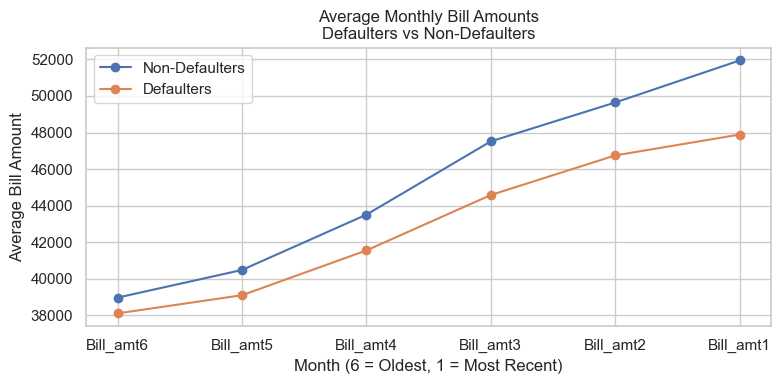

In [81]:
# EDA for Bill Amounts# Columns for monthly bill amounts
bill_cols = ['Bill_amt6', 'Bill_amt5', 'Bill_amt4', 'Bill_amt3', 'Bill_amt2', 'Bill_amt1']  # reversed for chronological order

# Group by default status
bill_means = df.groupby('next_month_default')[bill_cols].mean().T
bill_means.columns = ['Non-Defaulters', 'Defaulters'] if 0 in bill_means.columns else ['Defaulters', 'Non-Defaulters']

# Plot
bill_means.plot(figsize=(8, 4), marker='o')
plt.title("Average Monthly Bill Amounts\nDefaulters vs Non-Defaulters")
plt.xlabel("Month (6 = Oldest, 1 = Most Recent)")
plt.ylabel("Average Bill Amount")
plt.grid(True)
plt.tight_layout()
plt.show()

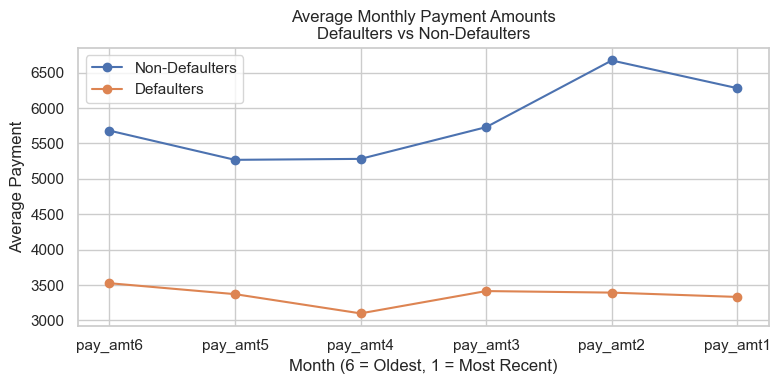

In [82]:
# Payment columns (chronologically reversed)
pay_cols_amt = ['pay_amt6', 'pay_amt5', 'pay_amt4', 'pay_amt3', 'pay_amt2', 'pay_amt1']

# Group by default status and calculate average
pay_means = df.groupby('next_month_default')[pay_cols_amt].mean().T
pay_means.columns = ['Non-Defaulters', 'Defaulters'] if 0 in pay_means.columns else ['Defaulters', 'Non-Defaulters']

# Plot
pay_means.plot(figsize=(8, 4), marker='o')
plt.title("Average Monthly Payment Amounts\nDefaulters vs Non-Defaulters")
plt.xlabel("Month (6 = Oldest, 1 = Most Recent)")
plt.ylabel("Average Payment")
plt.grid(True)
plt.tight_layout()
plt.show()

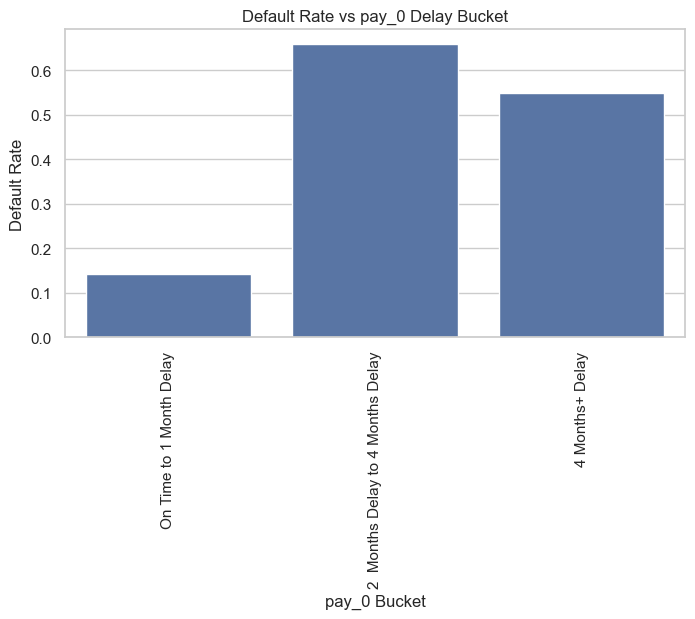

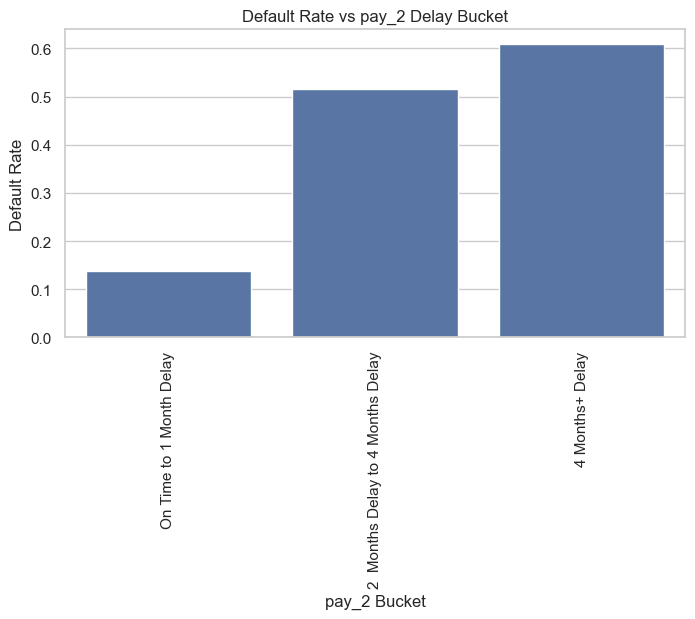

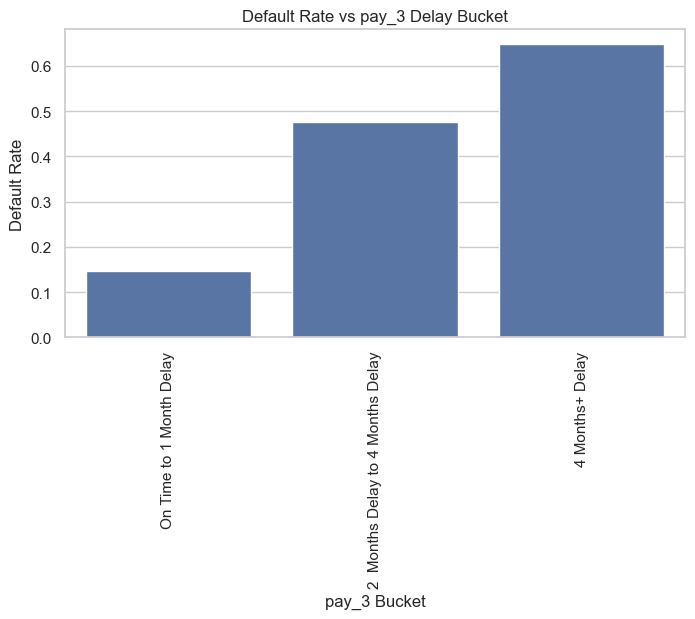

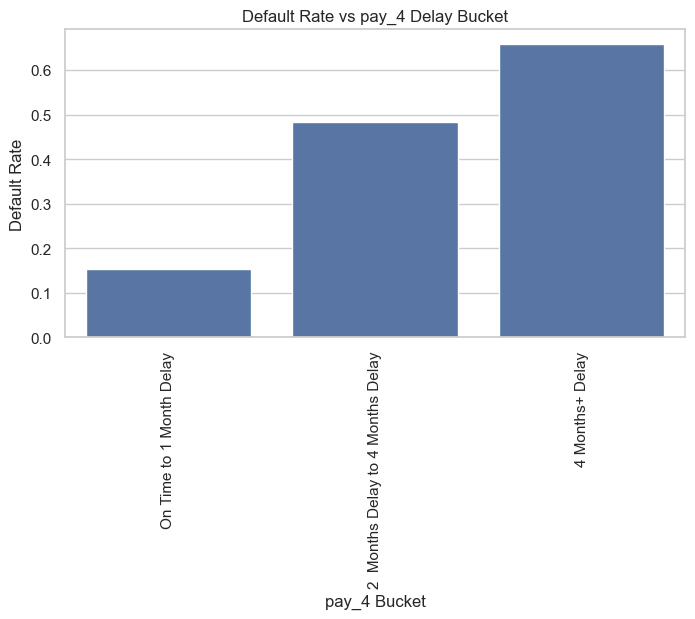

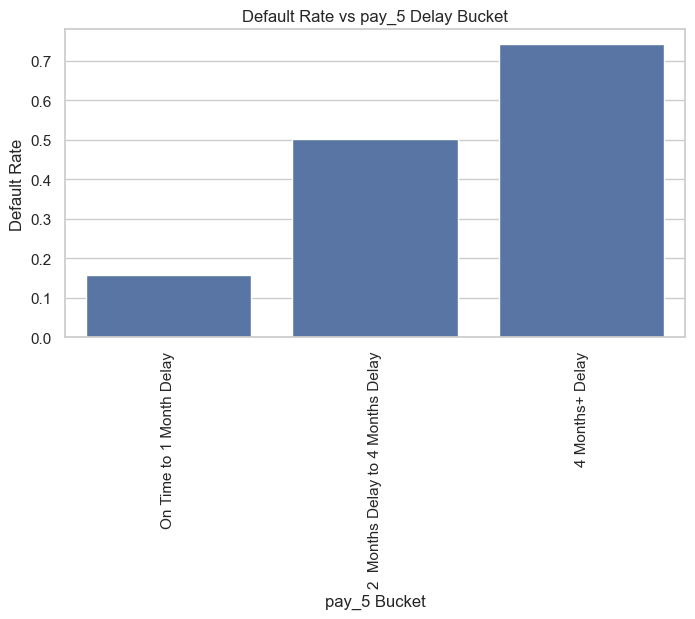

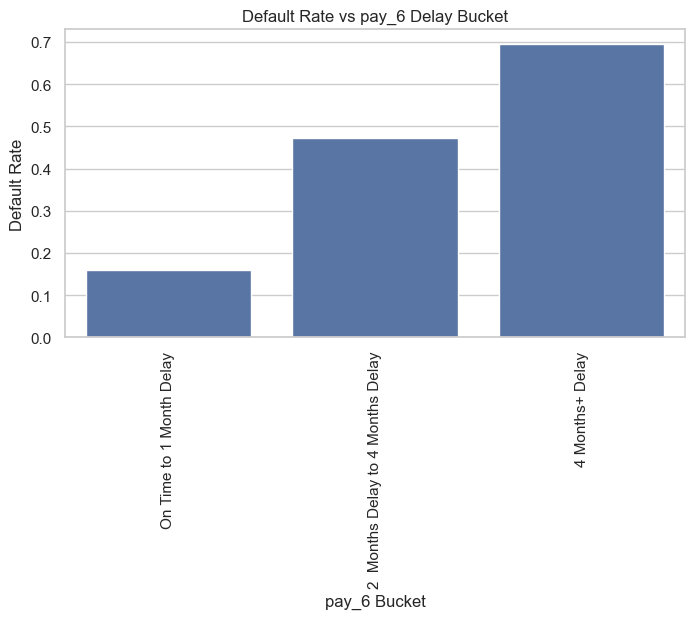

In [83]:
# Define delay_bucket function
def delay_bucket(x):
    if x <= 1:
        return 'On Time to 1 Month Delay'
    elif 2 <= x <= 4:
        return '2  Months Delay to 4 Months Delay'
    else:
        return '4 Months+ Delay'

#for pay_0 to pay_6, create buckets and plot default rate
for col in pay_status_cols[:]:
    df[f'{col}_bucket'] = df[col].apply(delay_bucket)
    grouped = df.groupby(f'{col}_bucket')['next_month_default'].agg(['mean', 'count']).reset_index()
    grouped.columns = [f'{col}_bucket', 'default_rate', 'count']
    
    plt.figure(figsize=(8, 4))
    sns.barplot(x=f'{col}_bucket', y='default_rate', data=grouped, order=[
        'On Time to 1 Month Delay', 
        '2  Months Delay to 4 Months Delay', 
        '4 Months+ Delay'
    ])
    plt.xticks(rotation=90)
    plt.title(f'Default Rate vs {col} Delay Bucket')
    plt.ylabel('Default Rate')
    plt.xlabel(f'{col} Bucket')
    plt.show()

In [84]:

df.drop(columns=['Customer_ID'], inplace=True)


In [85]:
df['sex'] = df['sex'].astype('category')
df['education'] = df['education'].astype('category')
df['marriage'] = df['marriage'].astype('category')
df['next_month_default'] = df['next_month_default'].astype('category')


In [86]:
# drop 'pay_0_bucket', 'pay_2_bucket', 'pay_3_bucket', 'pay_4_bucket', 'pay_5_bucket', 'pay_6_bucket', 'LIMIT_BAL_bucket'
df.drop(columns=['pay_0_bucket', 'pay_2_bucket', 'pay_3_bucket', 'pay_4_bucket', 'pay_5_bucket', 'pay_6_bucket'], inplace=True)

#print dimensions of the dataset
print("Final dataset shape:", df.shape)

#print cols
print("Columns in the final dataset:")
print(df.columns.tolist())


Final dataset shape: (25247, 26)
Columns in the final dataset:
['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default']


In [87]:
df.head()

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,2,0,2,60000,25.0,2,2,2,0,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,2,1,1,290000,24.0,0,0,-2,-2,-1,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,1,0,2,180000,63.0,0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,1,1,2,210000,43.0,0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [88]:
import numpy as np

# 1. UTILIZATION FEATURES
df['utilization'] = df[[f'Bill_amt{i}' for i in range(1, 7)]].sum(axis=1) / (6 * df['LIMIT_BAL'] + 1)
df['recent_utilization'] = df['Bill_amt1'] / (df['LIMIT_BAL'] + 1)

# 2. PAYMENT TO BILL RATIOS
df['avg_pay_ratio'] = df[[f'pay_amt{i}' for i in range(1, 7)]].sum(axis=1) / (df[[f'Bill_amt{i}' for i in range(1, 7)]].sum(axis=1) + 1)
df['recent_payment_ratio'] = df['pay_amt1'] / (df['Bill_amt1'] + 1)

# 3. BILL AND PAYMENT STATS
df['bill_mean'] = df[[f'Bill_amt{i}' for i in range(1, 7)]].mean(axis=1)
df['bill_std'] = df[[f'Bill_amt{i}' for i in range(1, 7)]].std(axis=1)
df['pay_mean'] = df[[f'pay_amt{i}' for i in range(1, 7)]].mean(axis=1)
df['pay_std'] = df[[f'pay_amt{i}' for i in range(1, 7)]].std(axis=1)

# 4. DELINQUENCY STREAKS & PATTERNS
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
df['overdue_count'] = (df[pay_cols] >= 1).sum(axis=1)
df['on_time_count'] = (df[pay_cols] == -1).sum(axis=1)
df['avg_delinquency'] = df[pay_cols].replace([-2, -1], 0).mean(axis=1)
df['recent_delinquency'] = df['pay_0'].apply(lambda x: max(x, 0))

# Max consecutive months of delay
def max_consec(arr):
    max_run = run = 0
    for x in arr:
        if x >= 1:
            run += 1
            max_run = max(max_run, run)
        else:
            run = 0
    return max_run
df['max_overdue_streak'] = df[pay_cols].apply(lambda row: max_consec(row.values), axis=1)

# Months since last overdue
def last_overdue(row):
    for i, x in enumerate(row):
        if x >= 1:
            return i  # 0 = most recent
    return len(row)
df['months_since_overdue'] = df[pay_cols].apply(lambda r: last_overdue(r.values), axis=1)

# 5. PAYMENT CONSISTENCY
df['repayment_consistency'] = df[[f'pay_amt{i}' for i in range(1, 7)]].apply(lambda row: (row > 0).sum(), axis=1) / 6

# 6. SHORTFALL & BEHAVIOR RATIOS
df['shortfall_count'] = sum(df[f'pay_amt{i}'] < df[f'Bill_amt{i}'] for i in range(1, 7))
df['rev_to_ontime'] = (1+(df[pay_cols] == 0).sum(axis=1)) / ((df[pay_cols] == -1).sum(axis=1) + 1)
df['rev_to_ontime'].fillna(0, inplace=True)

#clip avg_pay_ratio and recent_payment_ratio to 0.05 percentile and 99.95 percentile
q5_pay_ratio = df['avg_pay_ratio'].quantile(0.05)
q95_pay_ratio = df['avg_pay_ratio'].quantile(0.95)
df['avg_pay_ratio'] = df['avg_pay_ratio'].clip(lower=q5_pay_ratio, upper=q95_pay_ratio)
q5_recent_pay_ratio = df['recent_payment_ratio'].quantile(0.05)
q95_recent_pay_ratio = df['recent_payment_ratio'].quantile(0.95)
df['recent_payment_ratio'] = df['recent_payment_ratio'].clip(lower=q5_recent_pay_ratio, upper=q95_recent_pay_ratio) 






C:\Users\krish\AppData\Local\Temp\ipykernel_85392\1699472448.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rev_to_ontime'].fillna(0, inplace=True)


In [89]:
df.head(10)

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,pay_std,overdue_count,on_time_count,avg_delinquency,recent_delinquency,max_overdue_streak,months_since_overdue,repayment_consistency,shortfall_count,rev_to_ontime
0,2,0,2,60000,25.0,2,2,2,0,0,...,714.956931,3,0,1.000000,2,3,0,0.833333,6,4.000000
1,2,1,1,290000,24.0,0,0,-2,-2,-1,...,1129.473118,0,1,0.000000,0,0,6,0.500000,4,2.000000
2,1,0,2,180000,63.0,0,0,0,0,0,...,123.925072,0,0,0.000000,0,0,6,1.000000,6,7.000000
3,1,1,2,210000,43.0,0,0,0,0,0,...,337.634028,0,0,0.000000,0,0,6,1.000000,6,7.000000
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,...,17912.037141,0,0,0.000000,0,0,6,1.000000,4,1.000000
5,1,1,1,80000,35.0,-1,2,-1,-1,-1,...,1522.011710,1,5,0.333333,0,1,1,1.000000,3,0.166667
6,1,0,2,200000,37.0,-1,-1,0,-1,-1,...,4389.932198,0,4,0.000000,0,0,6,1.000000,3,0.600000
7,3,1,2,50000,24.0,0,0,0,0,0,...,1906.691823,0,0,0.000000,0,0,6,1.000000,6,7.000000
8,1,1,3,50000,44.0,0,0,0,0,0,...,3576.762792,0,0,0.000000,0,0,6,1.000000,5,7.000000
9,2,1,1,440000,34.0,0,-1,-1,-2,-1,...,5073.447053,0,3,0.000000,0,0,6,0.666667,4,0.750000


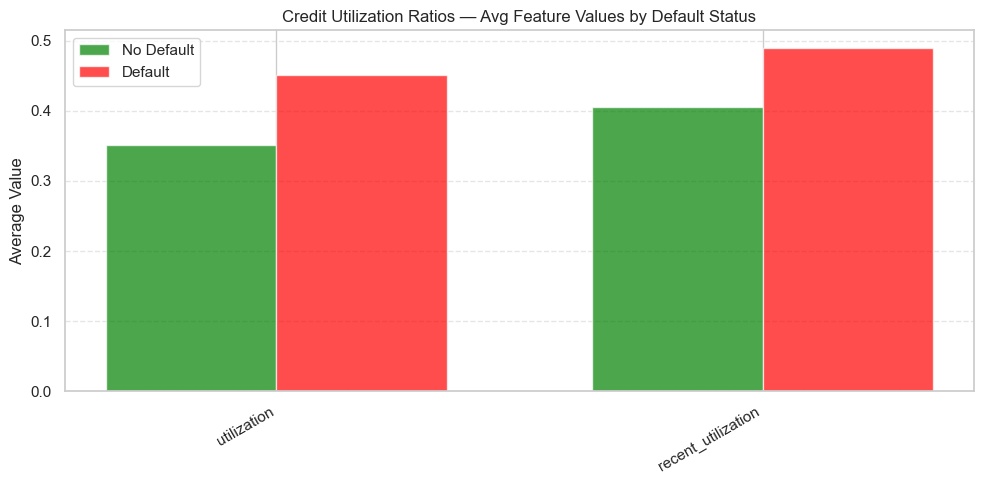

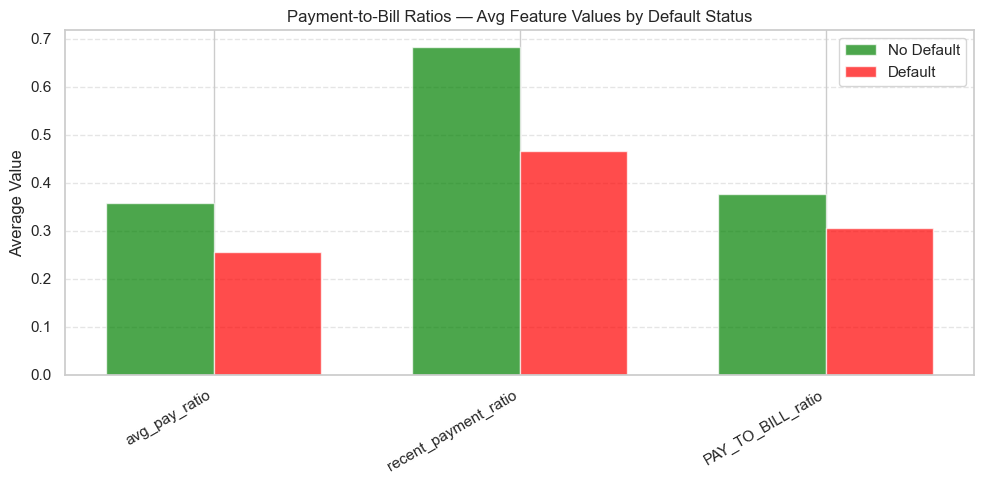

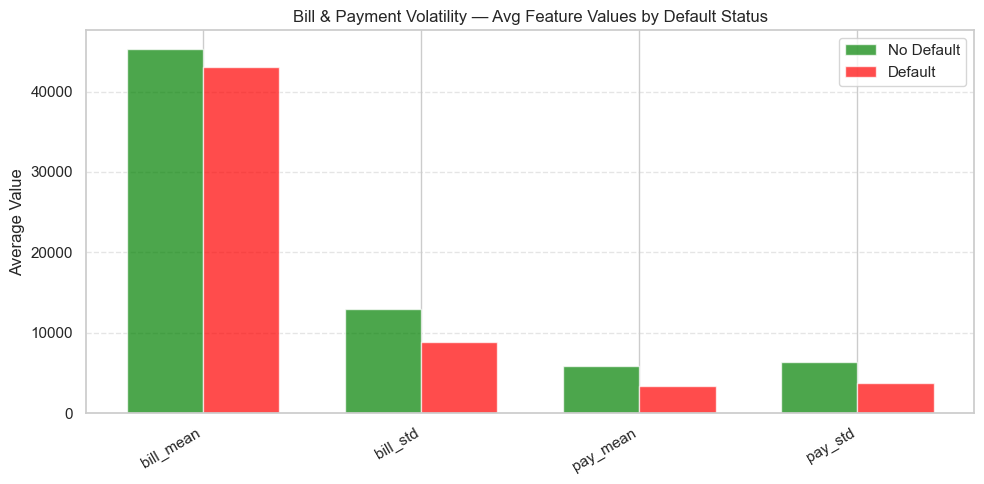

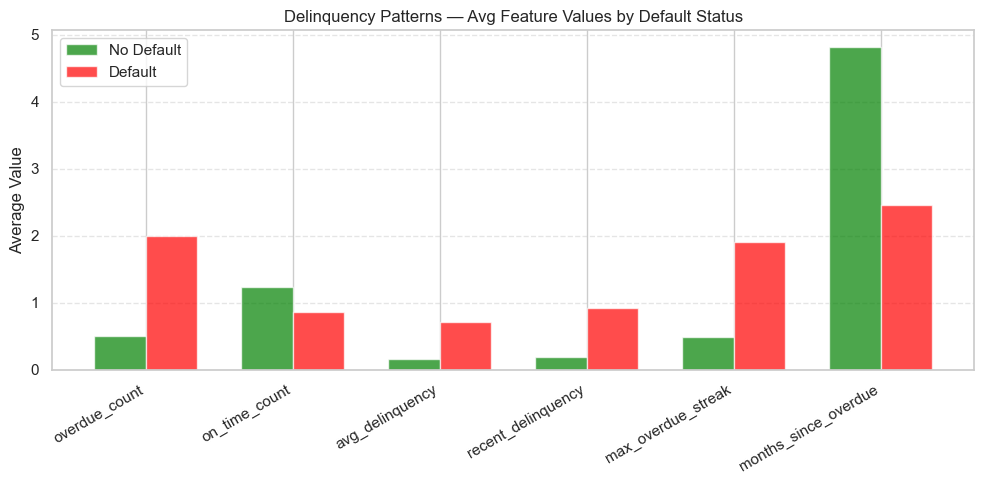

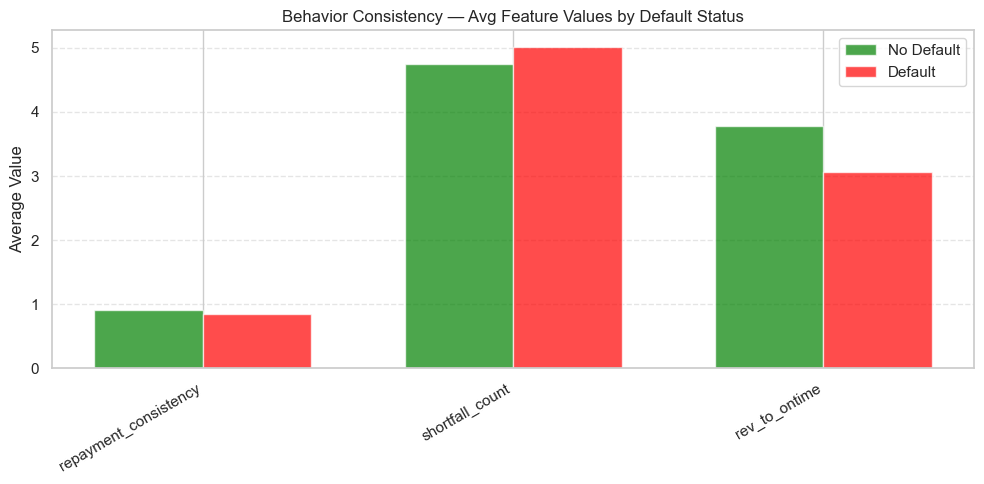

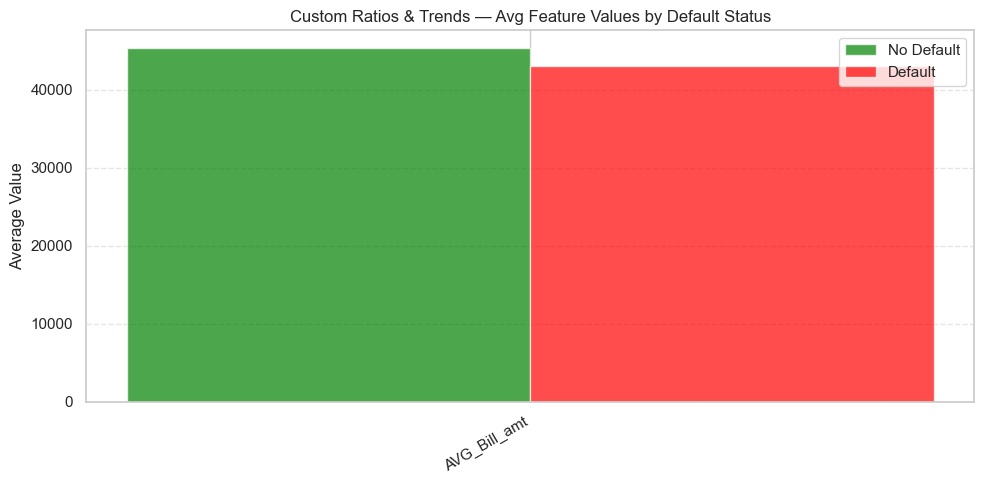

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Define feature groups
feature_groups = {
    'Credit Utilization Ratios': ['utilization', 'recent_utilization'],
    'Payment-to-Bill Ratios': ['avg_pay_ratio', 'recent_payment_ratio', 'PAY_TO_BILL_ratio'],
    'Bill & Payment Volatility': ['bill_mean', 'bill_std', 'pay_mean', 'pay_std'],
    'Delinquency Patterns': ['overdue_count', 'on_time_count', 'avg_delinquency', 
                             'recent_delinquency', 'max_overdue_streak', 'months_since_overdue'],
    'Behavior Consistency': ['repayment_consistency', 'shortfall_count', 'rev_to_ontime'],
    'Custom Ratios & Trends': ['AVG_Bill_amt']
}

# Split the data by class
df_non = df[df['next_month_default'] == 0]
df_def = df[df['next_month_default'] == 1]

# Create one plot per group
for group_name, features in feature_groups.items():
    means_non = df_non[features].mean()
    means_def = df_def[features].mean()
    
    x = np.arange(len(features))
    width = 0.35

    # Plot
    plt.figure(figsize=(10, 5))
    plt.bar(x - width/2, means_non, width, label='No Default', color='green', alpha=0.7)
    plt.bar(x + width/2, means_def, width, label='Default', color='red', alpha=0.7)
    
    # Labels and styling
    plt.xticks(x, features, rotation=30, ha='right')
    plt.ylabel('Average Value')
    plt.title(f'{group_name} — Avg Feature Values by Default Status')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


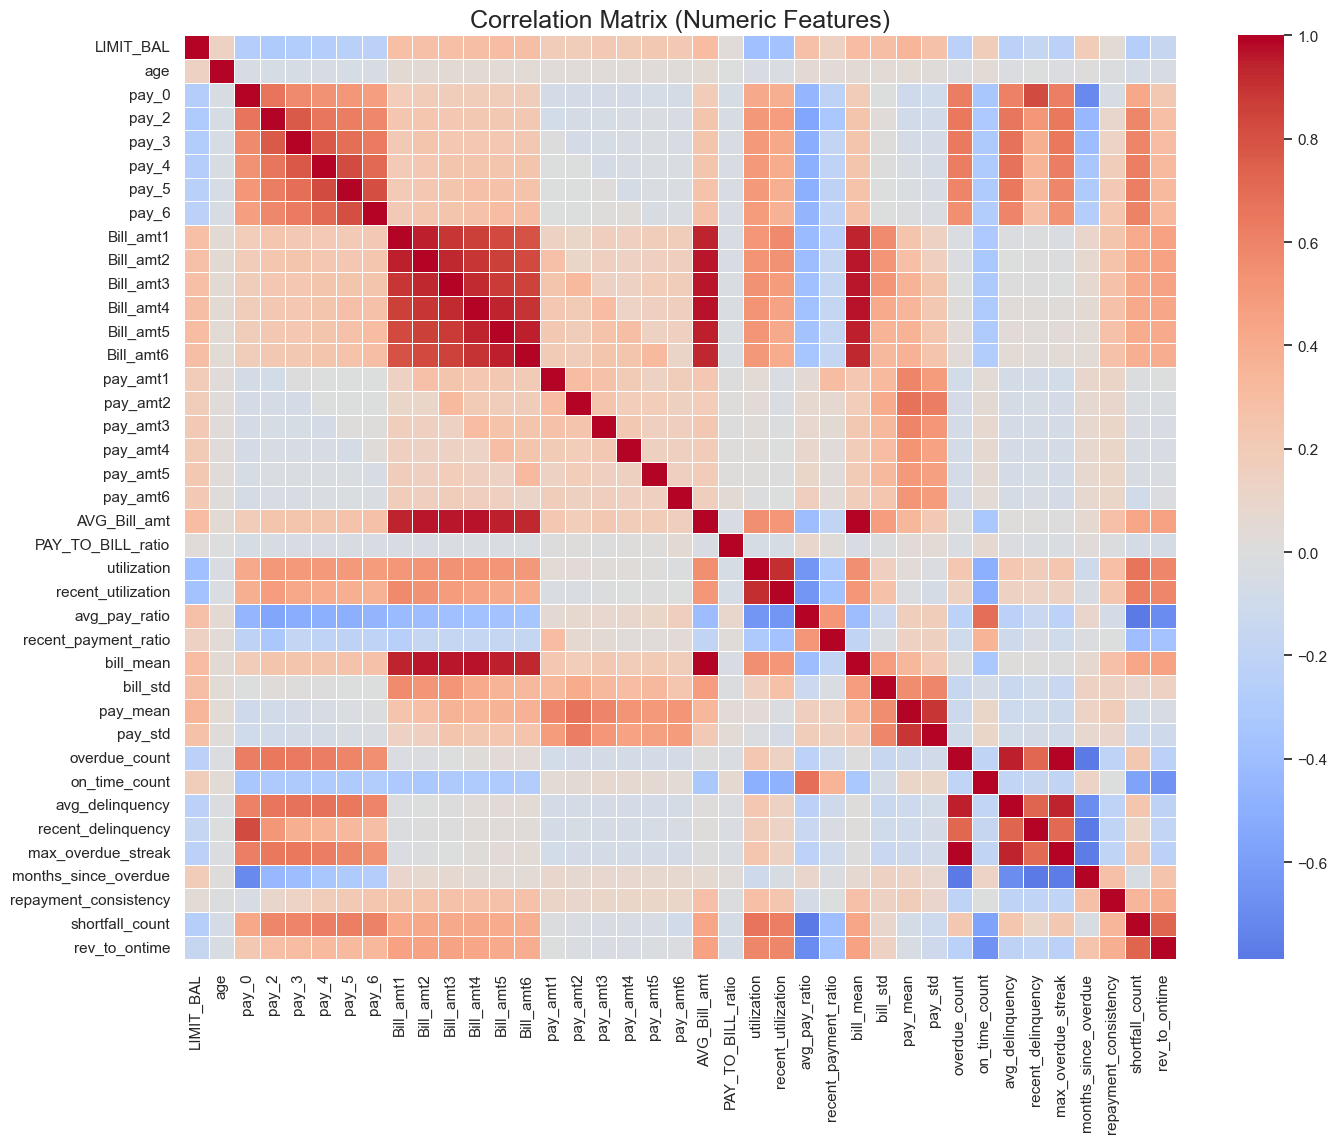

In [91]:
# plot overall correlation matrix
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix (Numeric Features)', fontsize=18)
plt.show()

In [92]:
selected_features = [
    # Demographics
    'age', 'education', 'marriage', 'sex', 
    # Credit Limit
    'LIMIT_BAL',
    # Utilization & Payment/Bill Ratios
    'utilization', 'recent_utilization', 'avg_pay_ratio', 'recent_payment_ratio',
    # Bill/Payment Statistics
    'bill_mean', 'bill_std',  'pay_std','pay_mean',
    # Delinquency Features
    'overdue_count', 'on_time_count', 'avg_delinquency', 'recent_delinquency',
    'max_overdue_streak', 'months_since_overdue', 
    # Behavior Consistency
    'repayment_consistency', 'shortfall_count', 
    # can remove 
    'rev_to_ontime',
    # Pay to Bill Ratios and average bill amount
    'PAY_TO_BILL_ratio', 'AVG_Bill_amt',
    
]

X = df[selected_features]
y = df['next_month_default']


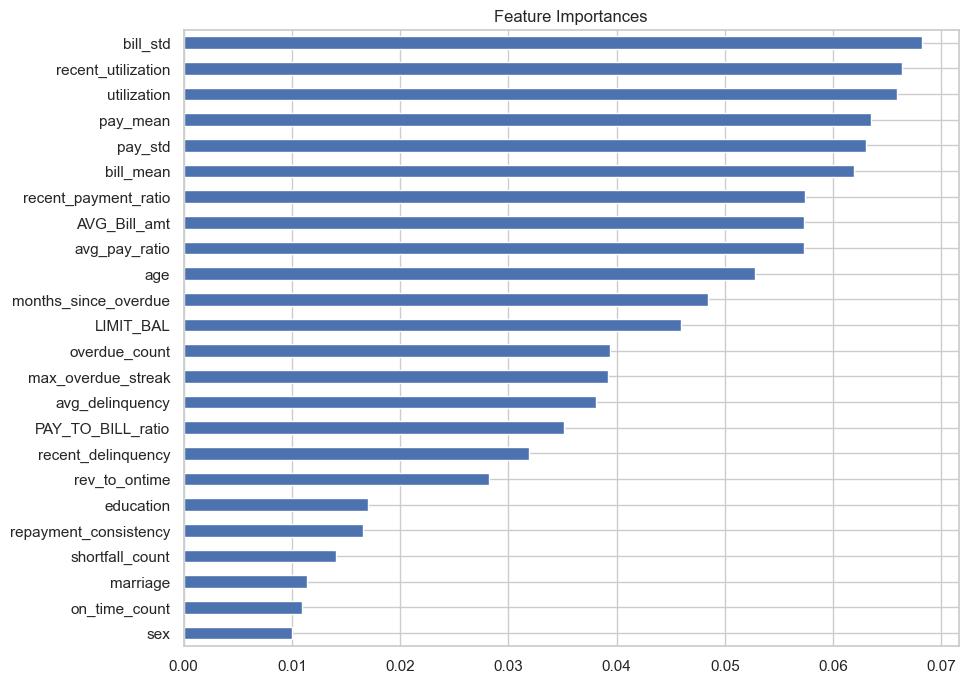

In [93]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X, y)

importances = model.feature_importances_
features = pd.Series(importances, index=X.columns)
features.sort_values(ascending=True).plot(kind='barh', figsize=(10,8))
plt.title("Feature Importances")
plt.show()


In [94]:
final_features = features.sort_values(ascending=False).head(20).index.tolist()

X = df[final_features]
y = df['next_month_default']

#check for NaN values in X
print("NaN values in X:")
print(X.isnull().sum())
#check for NaN values in y
print("NaN values in y:")
print(y.isnull().sum())

NaN values in X:
bill_std                 0
recent_utilization       0
utilization              0
pay_mean                 0
pay_std                  0
bill_mean                0
recent_payment_ratio     0
AVG_Bill_amt             0
avg_pay_ratio            0
age                      0
months_since_overdue     0
LIMIT_BAL                0
overdue_count            0
max_overdue_streak       0
avg_delinquency          0
PAY_TO_BILL_ratio        0
recent_delinquency       0
rev_to_ontime            0
education                0
repayment_consistency    0
dtype: int64
NaN values in y:
0


In [95]:
# # Step 2: Stratified Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

In [96]:
#print types of each column in X_train
print("Column types in X_train:")
print(X_train.dtypes)

#convert categorical columns to int
for col in X_train.select_dtypes(include=['category']).columns:
    X_train[col] = X_train[col].cat.codes
    X_test[col] = X_test[col].cat.codes

# Print the updated types after conversion
print("Updated column types in X_train after conversion:")
print(X_train.dtypes)


#check for NaN values in X_train and X_test
print("NaN values in X_train:")
print(X_train.isnull().sum())
print("NaN values in X_test:")
print(X_test.isnull().sum())

Column types in X_train:
bill_std                  float64
recent_utilization        float64
utilization               float64
pay_mean                  float64
pay_std                   float64
bill_mean                 float64
recent_payment_ratio      float64
AVG_Bill_amt              float64
avg_pay_ratio             float64
age                       float64
months_since_overdue        int64
LIMIT_BAL                   int64
overdue_count               int64
max_overdue_streak          int64
avg_delinquency           float64
PAY_TO_BILL_ratio         float64
recent_delinquency          int64
rev_to_ontime             float64
education                category
repayment_consistency     float64
dtype: object
Updated column types in X_train after conversion:
bill_std                 float64
recent_utilization       float64
utilization              float64
pay_mean                 float64
pay_std                  float64
bill_mean                float64
recent_payment_ratio     float64


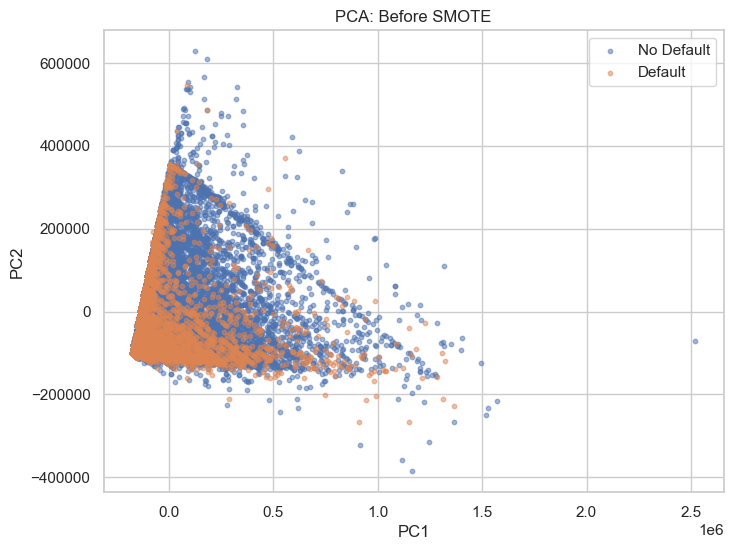

Class distribution in y_train before resampling:
Counter({0: 14307, 1: 3365})
Class distribution in y_train after resampling:
Counter({0: 13473, 1: 13473})


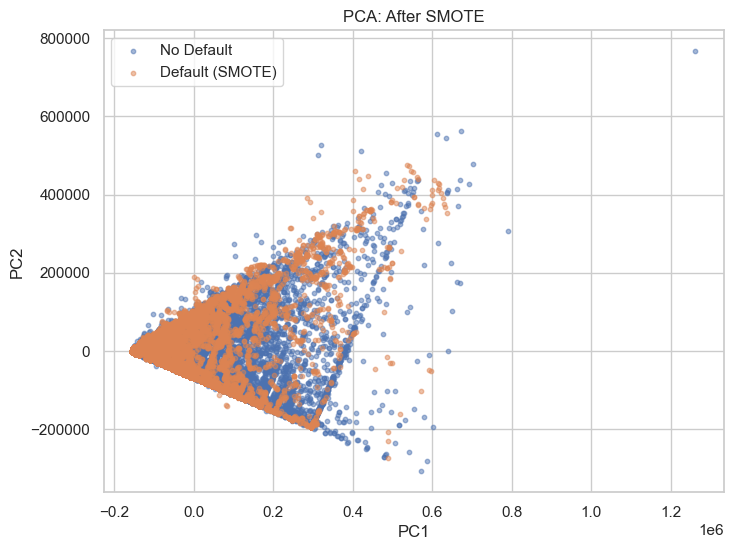

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import fbeta_score, accuracy_score, precision_score, recall_score, roc_auc_score
from imblearn.combine import SMOTETomek
import numpy as np
import pandas as pd


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Features and labels before SMOTE
X_before = df.drop('next_month_default', axis=1)
y_before = df['next_month_default']

# Reduce to 2D
pca_before = PCA(n_components=2)
X_pca_before = pca_before.fit_transform(X_before)

# Plot
df_pca_before = pd.DataFrame(X_pca_before, columns=['PC1', 'PC2'])
df_pca_before['label'] = y_before.values

plt.figure(figsize=(8, 6))
plt.scatter(df_pca_before[df_pca_before['label'] == 0]['PC1'], df_pca_before[df_pca_before['label'] == 0]['PC2'], 
            alpha=0.5, label='No Default', s=10)
plt.scatter(df_pca_before[df_pca_before['label'] == 1]['PC1'], df_pca_before[df_pca_before['label'] == 1]['PC2'], 
            alpha=0.5, label='Default', s=10)
plt.title("PCA: Before SMOTE")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


#before smote - counter plot
from collections import Counter
print("Class distribution in y_train before resampling:")
print(Counter(y_train))


# --- Resample with SMOTETomek ---
smk = SMOTETomek(random_state=42)
X_train_res, y_train_res = smk.fit_resample(X_train, y_train)

#after smote - counter plot
print("Class distribution in y_train after resampling:")
print(Counter(y_train_res))

# PCA after SMOTETomek resampling
pca_after = PCA(n_components=2)
X_pca_after = pca_after.fit_transform(X_train_res)

# Plot
df_pca_after = pd.DataFrame(X_pca_after, columns=['PC1', 'PC2'])
df_pca_after['label'] = y_train_res.values

plt.figure(figsize=(8, 6))
plt.scatter(df_pca_after[df_pca_after['label'] == 0]['PC1'], df_pca_after[df_pca_after['label'] == 0]['PC2'], 
            alpha=0.5, label='No Default', s=10)
plt.scatter(df_pca_after[df_pca_after['label'] == 1]['PC1'], df_pca_after[df_pca_after['label'] == 1]['PC2'], 
            alpha=0.5, label='Default (SMOTE)', s=10)
plt.title("PCA: After SMOTE")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()





In [98]:

# Convert resampled data to DataFrame (optional: use original column names)
X_train_res = pd.DataFrame(X_train_res, columns=X_train.columns if hasattr(X_train, 'columns') else None)
X_test = pd.DataFrame(X_test, columns=X_test.columns if hasattr(X_test, 'columns') else None)

# Convert all columns to numeric float32, filling any NaNs with 0
X_train_res = X_train_res.apply(pd.to_numeric, errors='coerce').fillna(0).astype(np.float32)
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0).astype(np.float32)

# Make sure target variables are 1D numpy arrays
if isinstance(y_train_res, pd.DataFrame):
    y_train_res = y_train_res.iloc[:, 0]
y_train_res = np.array(y_train_res).ravel()

if isinstance(y_test, pd.DataFrame):
    y_test = y_test.iloc[:, 0]
y_test = np.array(y_test).ravel()


# --- Class Imbalance Weight for XGBoost ---
pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# --- Model Definitions ---
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
rf = RandomForestClassifier(class_weight='balanced', n_estimators=200, max_depth=10, random_state=42)
xgb = XGBClassifier(scale_pos_weight=pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=42)

models = {
    'Logistic Regression': logreg,
    'Random Forest': rf,
    'XGBoost': xgb
}

# --- Evaluation Function ---
def evaluate_model(name, model):
    model.fit(X_train_res, y_train_res)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Find best threshold for F2-score
    thresholds = np.arange(0.1, 0.9, 0.01)
    f2_scores = [fbeta_score(y_test, y_proba >= t, beta=2) for t in thresholds]
    best_thresh = thresholds[np.argmax(f2_scores)]

    y_pred = (y_proba >= best_thresh).astype(int)

    print(f"\n{name} — Best Threshold for F2: {best_thresh:.2f}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", fbeta_score(y_test, y_pred, beta=1))
    print("F2-score:", fbeta_score(y_test, y_pred, beta=2))
    print("AUC-ROC:", roc_auc_score(y_test, y_proba))

    return {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': fbeta_score(y_test, y_pred, beta=1),
        'F2-score': fbeta_score(y_test, y_pred, beta=2),
        'AUC-ROC': roc_auc_score(y_test, y_proba)
    }

# --- Train and Evaluate Models ---
results = []
for name, model in models.items():
    results.append(evaluate_model(name, model))

# --- Display Results ---
results_df = pd.DataFrame(results).set_index('Model')
results_df = results_df.sort_values('F2-score', ascending=False)
print("\nFinal Model Comparison:\n")
print(results_df)


C:\Users\krish\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression — Best Threshold for F2: 0.34
Accuracy: 0.6711551155115512
Precision: 0.3324816352603002
Recall: 0.7219140083217753
F1-score: 0.4552809971572272
F2-score: 0.5848971794583661
AUC-ROC: 0.7577894806590753

Random Forest — Best Threshold for F2: 0.19
Accuracy: 0.5807260726072607
Precision: 0.29148629148629146
Recall: 0.840499306518724
F1-score: 0.4328571428571429
F2-score: 0.6105178319564779
AUC-ROC: 0.7848952925817065


C:\Users\krish\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [23:24:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost — Best Threshold for F2: 0.32
Accuracy: 0.6256105610561056
Precision: 0.30660377358490565
Recall: 0.7662968099861304
F1-score: 0.43797066983749505
F2-score: 0.5895219803670508
AUC-ROC: 0.7546163486995275

Final Model Comparison:

                     Accuracy  Precision    Recall  F1-score  F2-score  \
Model                                                                    
Random Forest        0.580726   0.291486  0.840499  0.432857  0.610518   
XGBoost              0.625611   0.306604  0.766297  0.437971  0.589522   
Logistic Regression  0.671155   0.332482  0.721914  0.455281  0.584897   

                      AUC-ROC  
Model                          
Random Forest        0.784895  
XGBoost              0.754616  
Logistic Regression  0.757789  


In [99]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Step 1: Retrain RF on full resampled data
best_rf = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=200,
    max_depth=10,
    random_state=42
)
best_rf.fit(X_train_res, y_train_res)

# Step 2: Predict on X_test
y_proba_test = best_rf.predict_proba(X_test)[:, 1]


thresholds = np.arange(0.1, 0.9, 0.01)
records = []

for t in thresholds:
    preds = (y_proba_test >= t).astype(int)
    
    f2 = fbeta_score(y_test, preds, beta=2, zero_division=0)
    f1 = f1_score(y_test, preds, zero_division=0)
    acc = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, zero_division=0)
    recall = recall_score(y_test, preds, zero_division=0)
    positives = preds.sum()

    records.append((t, acc, precision, recall, f1, f2, positives))

    # Debug print
    print(f"Threshold {t:.2f} — Acc: {acc:.3f}, Prec: {precision:.3f}, Rec: {recall:.3f}, F1: {f1:.3f}, F2: {f2:.3f}, PredictedPositives: {positives}")




Threshold 0.10 — Acc: 0.349, Prec: 0.222, Rec: 0.965, F1: 0.361, F2: 0.578, PredictedPositives: 6269
Threshold 0.11 — Acc: 0.376, Prec: 0.229, Rec: 0.962, F1: 0.370, F2: 0.586, PredictedPositives: 6060
Threshold 0.12 — Acc: 0.400, Prec: 0.235, Rec: 0.951, F1: 0.377, F2: 0.591, PredictedPositives: 5846
Threshold 0.13 — Acc: 0.424, Prec: 0.240, Rec: 0.937, F1: 0.382, F2: 0.593, PredictedPositives: 5624
Threshold 0.14 — Acc: 0.451, Prec: 0.247, Rec: 0.922, F1: 0.390, F2: 0.596, PredictedPositives: 5378
Threshold 0.15 — Acc: 0.479, Prec: 0.256, Rec: 0.909, F1: 0.399, F2: 0.602, PredictedPositives: 5125
Threshold 0.16 — Acc: 0.506, Prec: 0.264, Rec: 0.895, F1: 0.408, F2: 0.606, PredictedPositives: 4884
Threshold 0.17 — Acc: 0.533, Prec: 0.273, Rec: 0.876, F1: 0.416, F2: 0.608, PredictedPositives: 4624
Threshold 0.18 — Acc: 0.559, Prec: 0.283, Rec: 0.858, F1: 0.425, F2: 0.610, PredictedPositives: 4376
Threshold 0.19 — Acc: 0.581, Prec: 0.291, Rec: 0.840, F1: 0.433, F2: 0.611, PredictedPositi

C:\Users\krish\AppData\Local\Temp\ipykernel_85392\618858939.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  validate_df['rev_to_ontime'].fillna(0, inplace=True)


Data types in validate_df:
bill_std                 float64
recent_utilization       float64
utilization              float64
pay_mean                 float64
pay_std                  float64
bill_mean                float64
recent_payment_ratio     float64
AVG_Bill_amt             float64
avg_pay_ratio            float64
age                        int64
months_since_overdue       int64
LIMIT_BAL                  int64
overdue_count              int64
max_overdue_streak         int64
avg_delinquency          float64
PAY_TO_BILL_ratio        float64
recent_delinquency         int64
rev_to_ontime            float64
education                  int64
repayment_consistency    float64
dtype: object
Null values in validate_df:
bill_std                 0
recent_utilization       0
utilization              0
pay_mean                 0
pay_std                  0
bill_mean                0
recent_payment_ratio     0
AVG_Bill_amt             0
avg_pay_ratio            0
age                      0
m

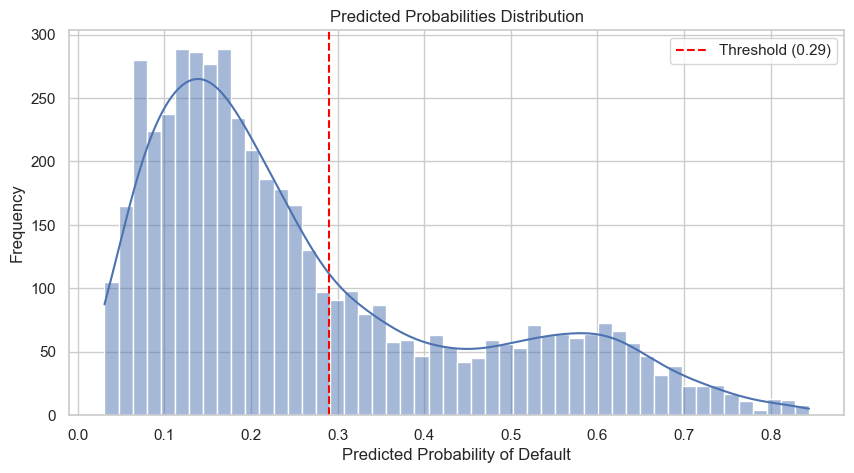

Predicted Class Distribution:
0    66.766348
1    33.233652
Name: proportion, dtype: float64


In [100]:
# --- Step 1: Load validation dataset ---
validate_df = pd.read_csv("validate_dataset_final.csv")

# --- Step 2: Preprocess validation dataset ---
# Feature engineering to match training data

# 1. UTILIZATION FEATURES
validate_df['utilization'] = validate_df[[f'Bill_amt{i}' for i in range(1, 7)]].sum(axis=1) / (6 * validate_df['LIMIT_BAL'] + 1e-6)
validate_df['recent_utilization'] = validate_df['Bill_amt1'] / (validate_df['LIMIT_BAL'] + 1e-6)

# 2. PAYMENT TO BILL RATIOS
validate_df['avg_pay_ratio'] = validate_df[[f'pay_amt{i}' for i in range(1, 7)]].sum(axis=1) / (validate_df[[f'Bill_amt{i}' for i in range(1, 7)]].sum(axis=1) + 1e-6)
validate_df['recent_payment_ratio'] = validate_df['pay_amt1'] / (validate_df['Bill_amt1'] + 1e-6)

# 3. BILL AND PAYMENT STATS
validate_df['bill_mean'] = validate_df[[f'Bill_amt{i}' for i in range(1, 7)]].mean(axis=1)
validate_df['bill_std'] = validate_df[[f'Bill_amt{i}' for i in range(1, 7)]].std(axis=1)
validate_df['pay_mean'] = validate_df[[f'pay_amt{i}' for i in range(1, 7)]].mean(axis=1)
validate_df['pay_std'] = validate_df[[f'pay_amt{i}' for i in range(1, 7)]].std(axis=1)

# 4. DELINQUENCY STREAKS & PATTERNS
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
validate_df['overdue_count'] = (validate_df[pay_cols] >= 1).sum(axis=1)
validate_df['avg_delinquency'] = validate_df[pay_cols].replace([-2, -1], 0).mean(axis=1)
validate_df['on_time_count'] = (validate_df[pay_cols] == -1).sum(axis=1)
validate_df['recent_delinquency'] = validate_df['pay_0'].apply(lambda x: max(x, 0))

# Max consecutive months of delay
def max_consec(arr):
    max_run = run = 0
    for x in arr:
        if x >= 1:
            run += 1
            max_run = max(max_run, run)
        else:
            run = 0
    return max_run
validate_df['max_overdue_streak'] = validate_df[pay_cols].apply(lambda row: max_consec(row.values), axis=1)

# Months since last overdue
def last_overdue(row):
    for i, x in enumerate(row):
        if x >= 1:
            return i  # 0 = most recent
    return len(row)
validate_df['months_since_overdue'] = validate_df[pay_cols].apply(lambda r: last_overdue(r.values), axis=1)

# 5. PAYMENT CONSISTENCY
validate_df['repayment_consistency'] = validate_df[[f'pay_amt{i}' for i in range(1, 7)]].apply(lambda row: (row > 0).sum(), axis=1) / 6

# 6. SHORTFALL & BEHAVIOR RATIOS
validate_df['shortfall_count'] = sum(validate_df[f'pay_amt{i}'] < validate_df[f'Bill_amt{i}'] for i in range(1, 7))
validate_df['rev_to_ontime'] = (validate_df[pay_cols] == 0).sum(axis=1) / ((validate_df[pay_cols] == -1).sum(axis=1) + 1e-6)
validate_df['rev_to_ontime'].fillna(0, inplace=True)

# Now select columns in the same order as X_train_res
validate_df = validate_df[X_train_res.columns]

#print data types of validate_df
print("Data types in validate_df:")
print(validate_df.dtypes)

#print null values in validate_df
print("Null values in validate_df:")
print(validate_df.isnull().sum())

#for sex,marriage,education, print unique values

# print("Unique values in : ")
# for col in ["sex", "marriage", "education"]:
#     print(f"{col}: {validate_df[col].unique()}")

# in marriage assign 0 to 4
#validate_df['marriage'] = validate_df['marriage'].replace({0: 4})  # Assuming 0 is 'Other' and should be treated as 'Divorced/Separated'

# in edu replace 0,5,6 with 4
validate_df['education'] = validate_df['education'].replace({0: 4, 5: 4, 6: 4})  # Assuming these should be treated as 'Graduate School'


X_test_new = validate_df

#print data types of X_test_new
print("Data types in X_test_new:")
print(X_test_new.dtypes)


# Ensure X_test_new is a deep copy (not a view)
X_test_new = X_test_new.copy()

# Identify numeric columns
numerical_cols = X_test_new.select_dtypes(include=['int64', 'float64']).columns

# Convert all numeric columns to float explicitly
X_test_new[numerical_cols] = X_test_new[numerical_cols].astype('float64')


# Convert to float32 and handle any non-numeric entries
X_test_new = X_test_new.apply(pd.to_numeric, errors='coerce').fillna(0).astype(np.float32)

# --- Step 3: Make predictions using the trained Random Forest model ---
# Use threshold based on F2-score (e.g., 0.24 from your output)
best_threshold = 0.29

# Predict probabilities
validate_probs = rf.predict_proba(X_test_new)[:, 1]

# Apply threshold
validate_preds = (validate_probs >= best_threshold).astype(int)

# --- Step 4: Save predictions ---
output_df = pd.DataFrame({
    'ID': validate_df.index,  # or any other ID column if present in original CSV
    'Default_Prediction': validate_preds
})

output_df.to_csv("submission_23114050.csv", index=False)

print("✅ Predictions saved to submission_23114050.csv")

# plot predicted probabilities distribution and count of each class
plt.figure(figsize=(10, 5))
sns.histplot(validate_probs, bins=50, kde=True)
plt.title("Predicted Probabilities Distribution")
plt.xlabel("Predicted Probability of Default")
plt.ylabel("Frequency")
plt.axvline(best_threshold, color='red', linestyle='--', label='Threshold (0.29)')
plt.legend()
plt.show()
# Count of each class in predictions
print("Predicted Class Distribution:")
print(pd.Series(validate_preds).value_counts(normalize=True) * 100)



